In [1]:
import matplotlib.pyplot as plt
import numpy as np

# from structured_random_features.src.models.weights import V1_weights

# Package for importing image representation
from PIL import Image, ImageOps

# My code
# from src.V1_reconst import generate_Y, reconstruct
# from src.filter_reconst import filter_reconstruction

import seaborn as sns
import time
import os.path

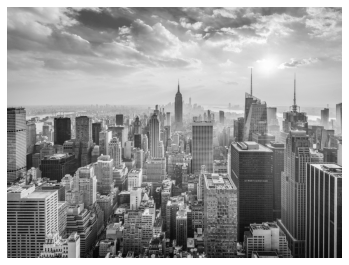

In [2]:
image_nm = 'city.png'
img = Image.open('image/' + image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.figure(figsize=(6, 6))
plt.imshow(img, 'gray')
plt.axis('off')
# plt.savefig("image/city_grayscaled.png", dpi = 300)
orig_dim = img_arr.shape

/tmp/ipykernel_32732/2012208751.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


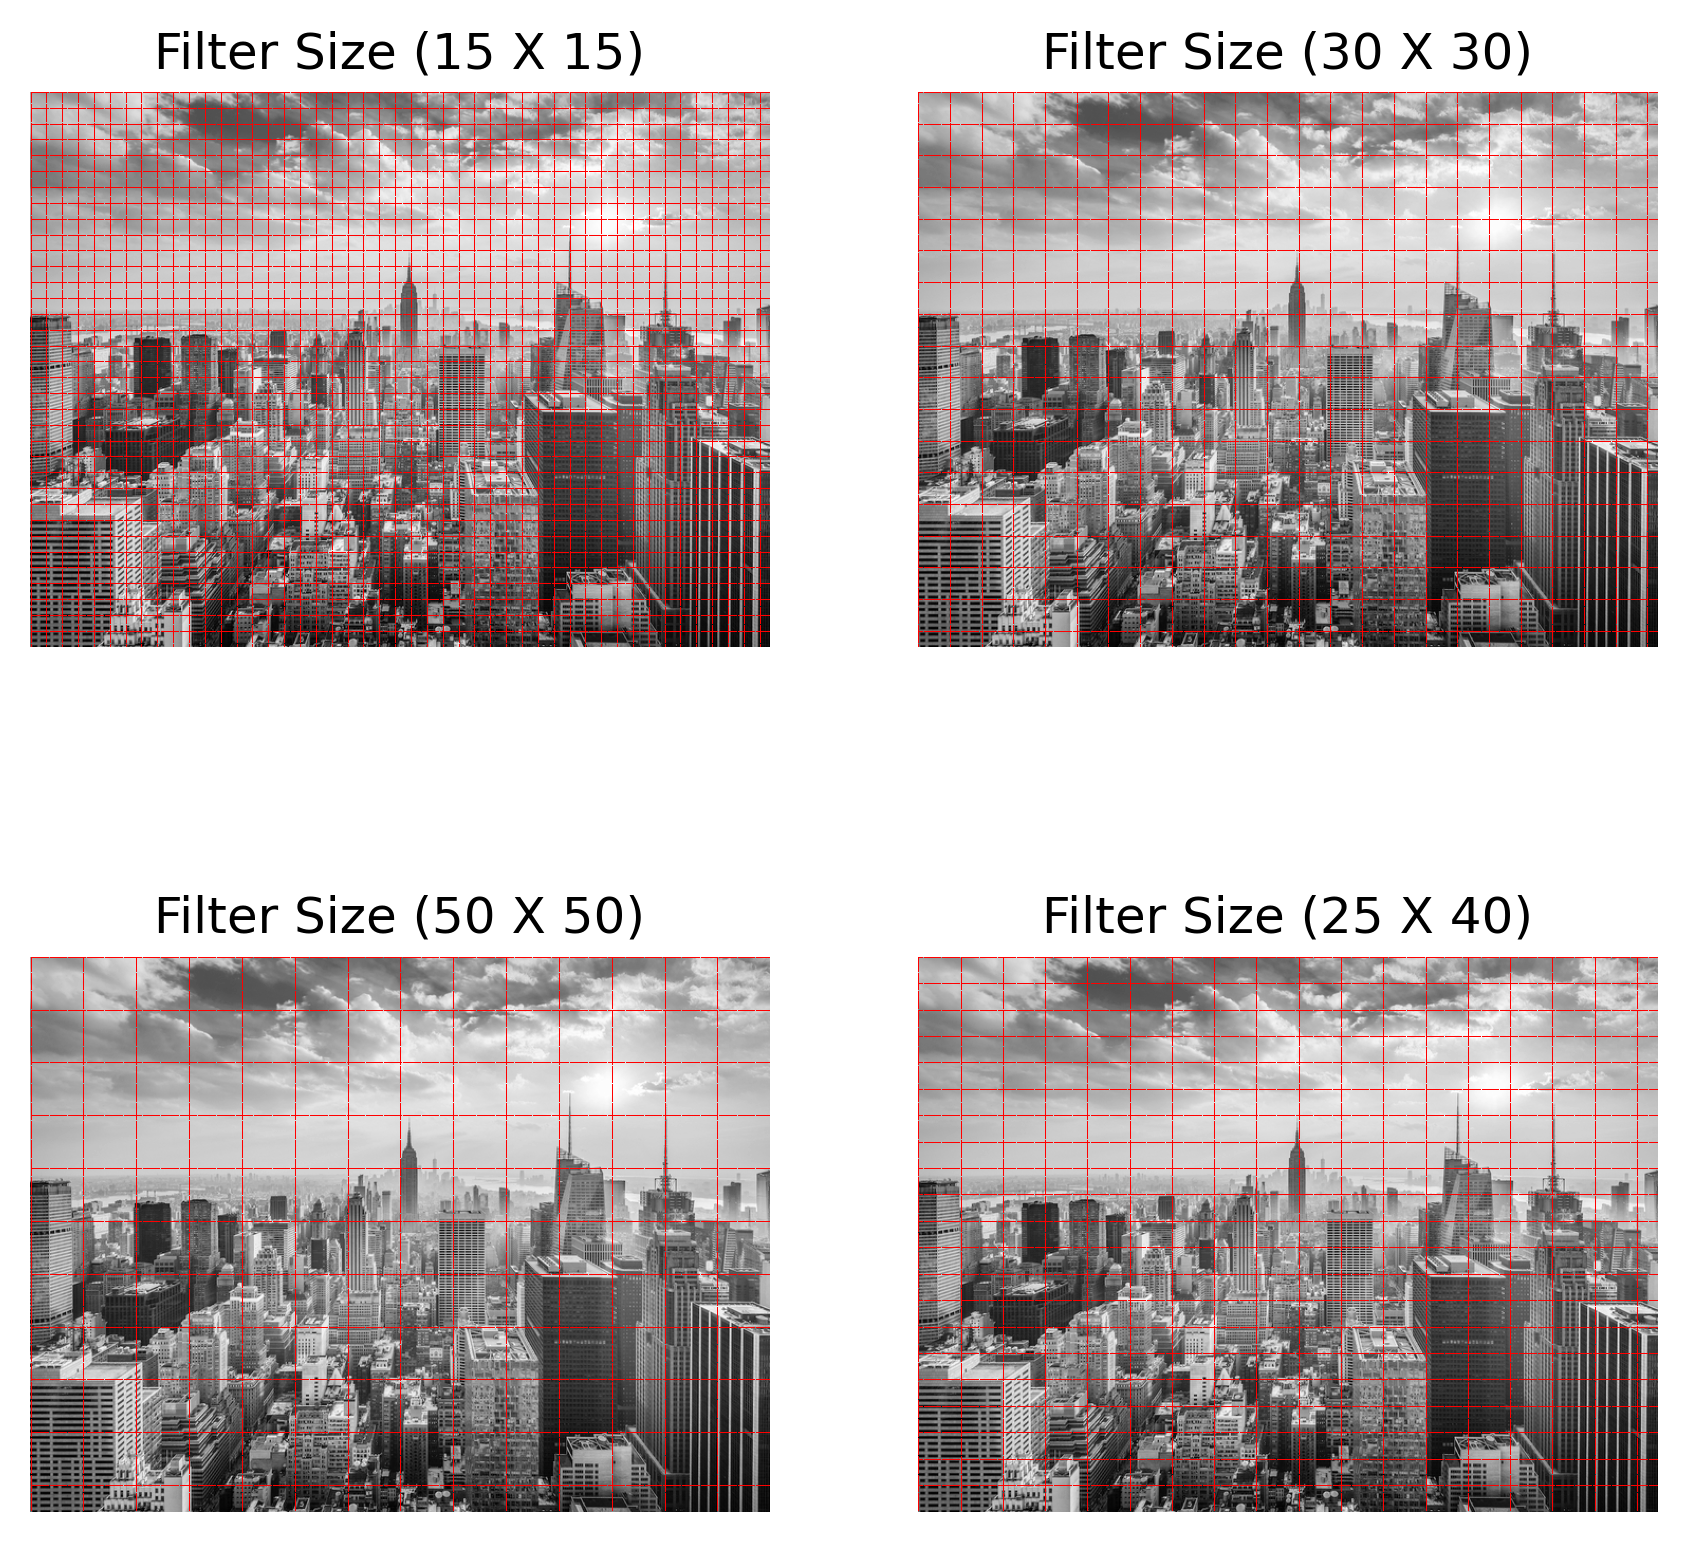

In [29]:
# Draw filter grid
n, m = img_arr.shape
filter_dim_list = [(15, 15), (30, 30), (50, 50), (25, 40)]
grid = np.zeros(img_arr.shape)


fig, axs = plt.subplots(2, 2, figsize=(7, 7), dpi = 300)
row = 0
col = 0
# fig.tight_layout()
for filt_n, filt_m in filter_dim_list:
    x = []
    y = []
    for i in range (n):
        for j in range (m):
            if (i % filt_n == 0 or j % filt_m == 0):
                x.append(j)
                y.append(i)
                grid[i][j] = 1
    axs[row, col].imshow(img_arr, 'gray')
    axs[row, col].plot(x, y, 'r,', linewidth=10)
    axs[row, col].axis('off')
    axs[row, col].set_title("Filter Size ({filt_n} X {filt_m})".format(filt_n = filt_n, filt_m = filt_m))
    if (col == 1):
        row += 1
        col = 0
    else :
        col += 1
fig.savefig("filter_grid.png")
fig.show()

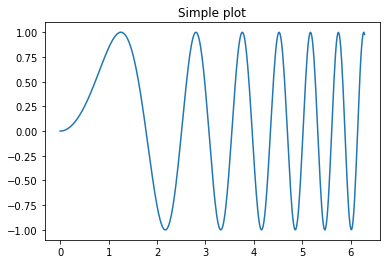

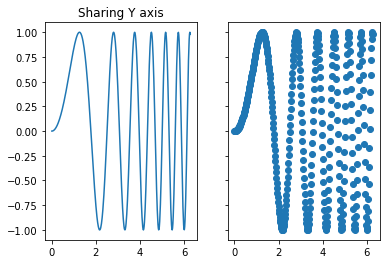

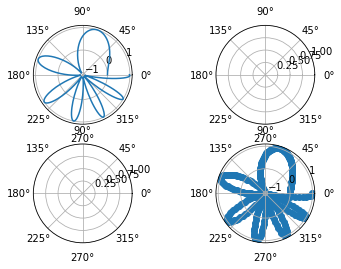

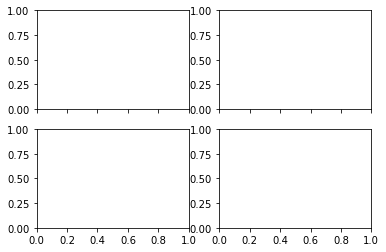

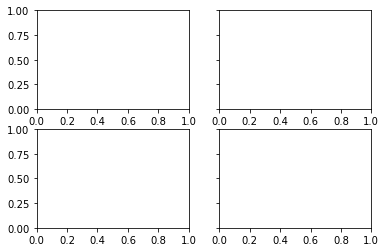

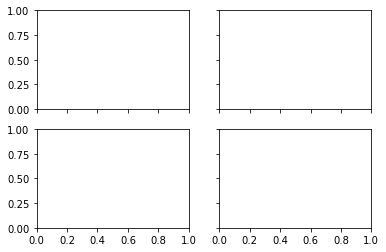

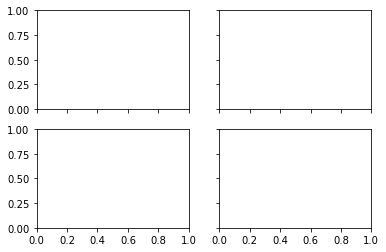

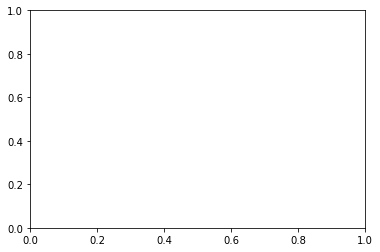

In [8]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)